In [46]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
#Задание 1
cardio = pd.read_csv('/home/axolotlove/Downloads/cardio_train.csv', sep=';')
cardio

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [39]:
cardio.groupby('gender').height.median()

gender
1    161
2    170
Name: height, dtype: int64

In [40]:
cardio.groupby('gender').weight.median()

gender
1    70.0
2    75.0
Name: weight, dtype: float64

In [41]:
gender_values = {1:'female', 2:'male'}
cardio['gender_name'] = cardio['gender'].map(gender_values)
cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,gender_name
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,male
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,female
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,female
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,male
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,female


In [42]:
cardio = cardio.drop(['gender'], axis=1)

In [43]:
cardio.groupby('gender_name').id.count()

gender_name
female    45530
male      24470
Name: id, dtype: int64

In [44]:
#Задание 2
cardio.height = cardio.height / 100

In [45]:
cardio['bmi'] = cardio.weight / (cardio.height * cardio.height)
cardio

,id,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,gender_name,bmi
0,0,18393,1.68,62.0,110,80,1,1,0,0,1,0,male,21.967120
1,1,20228,1.56,85.0,140,90,3,1,0,0,1,1,female,34.927679
2,2,18857,1.65,64.0,130,70,3,1,0,0,0,1,female,23.507805
3,3,17623,1.69,82.0,150,100,1,1,0,0,1,1,male,28.710479
4,4,17474,1.56,56.0,100,60,1,1,0,0,0,0,female,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,1.68,76.0,120,80,1,1,1,0,1,0,male,26.927438
69996,99995,22601,1.58,126.0,140,90,2,2,0,0,1,1,female,50.472681
69997,99996,19066,1.83,105.0,180,90,3,1,0,1,0,1,male,31.353579
69998,99998,22431,1.63,72.0,135,80,1,2,0,0,0,1,female,27.099251


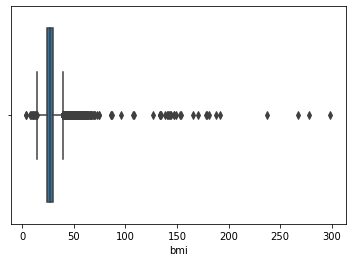

In [47]:
#Задание 3
sns.boxplot(cardio.bmi)
#Видим выбросы выше и ниже доверительного интервала.

In [52]:
#Задание 4
cardio_unhealthy = cardio[cardio.ap_lo > cardio.ap_hi]
cardio_unhealthy

,id,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,gender_name,bmi
228,314,17489,1.83,98.0,160,1100,1,2,1,0,1,1,male,29.263340
241,334,21932,1.57,60.0,160,1000,2,1,0,0,0,1,male,24.341758
260,357,18217,1.50,83.0,140,800,1,1,0,0,1,1,female,36.888889
329,458,23407,1.76,63.0,160,1000,2,2,0,0,0,1,female,20.338326
345,482,18704,1.54,81.0,140,1000,2,1,0,0,1,1,female,34.154158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69771,99659,23330,1.67,81.0,160,1000,1,1,0,0,1,1,female,29.043709
69872,99798,21808,1.52,56.0,160,1000,1,1,0,0,1,1,female,24.238227
69878,99807,21239,1.68,95.0,160,1000,1,1,0,0,1,1,male,33.659297
69885,99816,22417,1.66,78.0,170,1000,1,1,0,0,0,0,male,28.305995


In [53]:
cardio_healthy = cardio.drop(cardio[cardio.ap_lo > cardio.ap_hi].index)

In [54]:
proportion_of_unhealthy = cardio_unhealthy.size / cardio.size
proportion_of_unhealthy

0.017628571428571427

In [57]:
#Задание 5
chol_values = {1:'low', 2:'normal', 3:'high'}
cardio['dummy_cholesterol'] = cardio['cholesterol'].map(chol_values)
cardio['age'] = (cardio['age'] / 365).round()
cardio.head()

,id,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,gender_name,bmi,dummy_cholesterol
0,0,50.0,1.68,62.0,110,80,1,1,0,0,1,0,male,21.967120,low
1,1,55.0,1.56,85.0,140,90,3,1,0,0,1,1,female,34.927679,high
2,2,52.0,1.65,64.0,130,70,3,1,0,0,0,1,female,23.507805,high
3,3,48.0,1.69,82.0,150,100,1,1,0,0,1,1,male,28.710479,low
4,4,48.0,1.56,56.0,100,60,1,1,0,0,0,0,female,23.011177,low


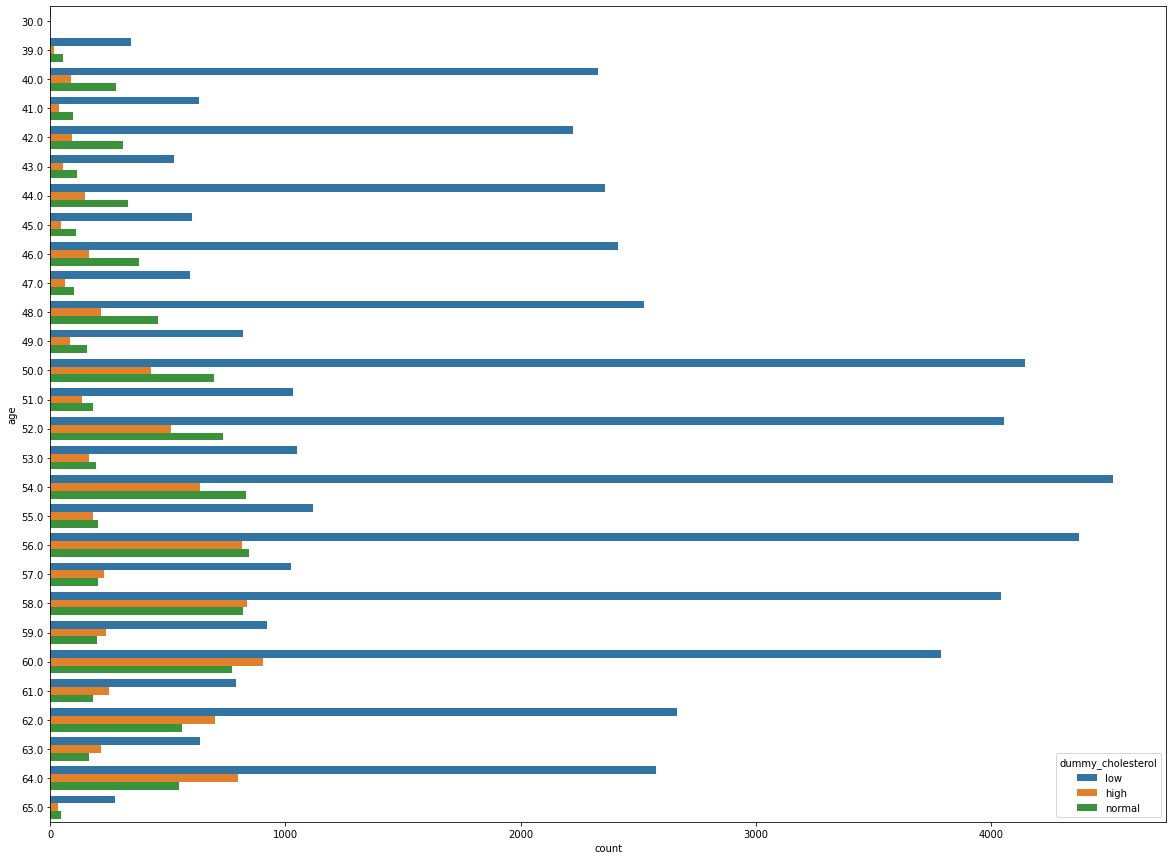

In [60]:
plt.figure(figsize = (20, 15)) 
sns.countplot(y = 'age', hue = 'dummy_cholesterol', data = cardio)

In [63]:
#Задание 6
cardio['CVD'] = cardio.ap_lo > cardio.ap_hi

,id,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,gender_name,bmi,dummy_cholesterol,CVD
0,0,50.0,1.68,62.0,110,80,1,1,0,0,1,0,male,21.967120,low,False
1,1,55.0,1.56,85.0,140,90,3,1,0,0,1,1,female,34.927679,high,False
2,2,52.0,1.65,64.0,130,70,3,1,0,0,0,1,female,23.507805,high,False
3,3,48.0,1.69,82.0,150,100,1,1,0,0,1,1,male,28.710479,low,False
4,4,48.0,1.56,56.0,100,60,1,1,0,0,0,0,female,23.011177,low,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53.0,1.68,76.0,120,80,1,1,1,0,1,0,male,26.927438,low,False
69996,99995,62.0,1.58,126.0,140,90,2,2,0,0,1,1,female,50.472681,normal,False
69997,99996,52.0,1.83,105.0,180,90,3,1,0,1,0,1,male,31.353579,high,False
69998,99998,61.0,1.63,72.0,135,80,1,2,0,0,0,1,female,27.099251,low,False


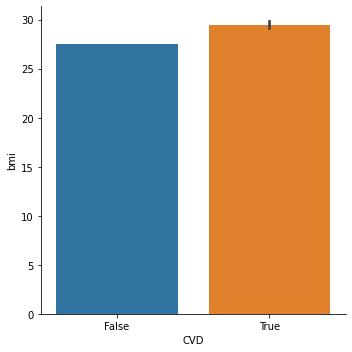

In [64]:
sns.catplot(x="CVD", y="bmi", kind="bar", data=cardio)